## Data Mining and Machine Learning
### Logistic Regression: The  ROC curve
### Libraries:scikit-learn and h2o
#### Edgar Acuna

#### March 2021

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import h2o
from h2o.estimators.glm  import H2OGeneralizedLinearEstimator
import warnings
warnings.filterwarnings('ignore')
#h2o.connect()
#h2o.no_progress()
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,6 mins 45 secs
H2O_cluster_timezone:,America/La_Paz
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_eacun_dndsro
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.946 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


### I Regresion Logistica para Diabetes usando scikit learn

In [2]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#La variable de respuesta y debe ser binaria (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression()
model = model.fit(X, y)
print(model.coef_)

[[ 1.17252327e-01  3.35996385e-02 -1.40874293e-02 -1.27054664e-03
  -1.24031009e-03  7.72025616e-02  1.41904108e+00  1.00355496e-02]]


In [3]:
# Tasa de precision
print(model.score(X, y))

0.7825520833333334


In [4]:
predictions = model.predict(X)
print(predictions)

[1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1
 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 1 0 0 0 

In [5]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.57      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.75       768
weighted avg       0.78      0.78      0.77       768



### II. ROC curve using scikit-learn

In [6]:
#Hallando las probabilidades posteriores
probs = model.predict_proba(X)
preds = probs[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, preds)
roc_auc = auc(false_positive_rate, true_positive_rate)

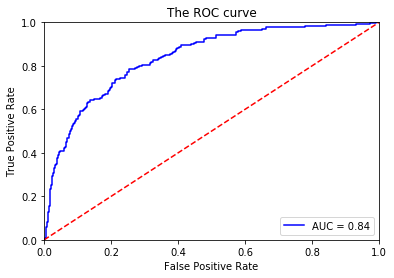

In [7]:
plt.title('The ROC curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC value represents the area under the curve ROC (azul). Ia classifier has an  AUC between .9 and 1 then its predictions are very good, if the AUC lies between  .8 y .89 its prediction are good. A poor classifier is one with an  AUC less than de .60 de AUC.


### III Intersection of the sensitivity and  specifity curves to choose the threshold

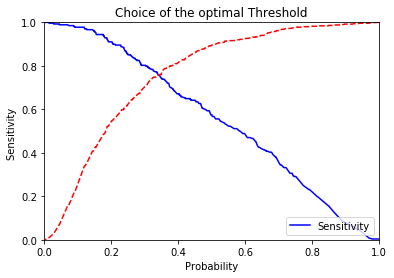

In [8]:
plt.title('Choice of the optimal Threshold')
plt.plot(thresholds, true_positive_rate, 'b',label='Sensitivity')
plt.legend(loc='lower right')
plt.plot(thresholds, 1-false_positive_rate,'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.ylabel('Sensitivity ')
plt.xlabel('Probability')
plt.show()

El threshold que deberia ser usado en lugar de p=.5 para hacer la clasificacion sera aprox .35

### IV.  ROC curve using H20

In [9]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy='C9'
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(myx, myy, training_frame= diabetes)
glm_model
glm_model._model_json['output']['coefficients_table']

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%

Coefficients: glm coefficients


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-8.404696,0.716636,-11.727984,0.000000e+00,-0.871102
1,C1,0.123182,0.032078,3.840140,1.229642e-04,0.415072
2,C2,0.035164,0.003709,9.481392,0.000000e+00,1.124276
3,C3,-0.013296,0.005234,-2.540416,1.107208e-02,-0.257346
4,C4,0.000619,0.006899,0.089713,9.285152e-01,0.009874
5,C5,-0.001192,0.000901,-1.322309,1.860652e-01,-0.137336
6,C6,0.089701,0.015088,5.945333,2.758957e-09,0.707217
7,C7,0.945180,0.299148,3.159578,1.579980e-03,0.313165
8,C8,0.014869,0.009335,1.592858,1.111920e-01,0.174863


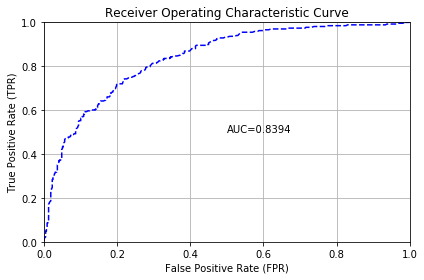

In [10]:
perf = glm_model.model_performance()  #train=True is the default, so it's not needed
perf.plot()

In [11]:
#Effect after using the threshokd
#Number of instances assigned to class 1 using p=.5
dp1=data[preds>.5]
dp1['class'].value_counts()

2    154
1     53
Name: class, dtype: int64

In [12]:
pred1=[1]*768
pred1=np.array(pred1)
pred1[dp1.index]=2
pd.crosstab(pred1,data['class'],rownames=['class_pred'])

class,1,2
class_pred,,
1,447,114
2,53,154


In [13]:
#accuracy
595/768

0.7747395833333334

In [14]:
#Number of instances assigned to class 1 using p=.35
dp2=data[preds>.35]
dp2['class'].value_counts()

2    199
1    115
Name: class, dtype: int64

In [15]:
pred1=[1]*768
pred1=np.array(pred1)
pred1[dp2.index]=2
pd.crosstab(pred1,data['class'],rownames=['class_pred'])

class,1,2
class_pred,,
1,385,69
2,115,199


In [16]:
#New accuracy
591/768

0.76953125